### EDA_02: Bivariate Analysis & Strategic Hypothesis-Driven Investigation
##### Project name: Employee Churn Prediction
##### Author: Fausto Pucheta Fortin

### **Overview:**
This notebook focuses on understanding the factors influencing employee turnover by performing bivariate analysis and hypothesis-driven investigation. Key steps include examining the relationships between the target variable (left) and key features, identifying significant patterns, and highlighting actionable insights for model feature engineering.

**Approach**: Application of statistical tests and insights visualization to uncover turnover patterns, considering both individual features and feature interactions that impact turnover.

##### 1. **Continuous Features**
**1.1. Satisfaction Level vs. Left**: Visualized distributions of satisfaction levels among employees who stayed versus those who left. Focus on identifying threshold ranges that may signal increased turnover risk.

**1.2. Last Evaluation vs. Left**: Asses last evaluation scores across turnover groups, identifying any indication of under- or over-performance that correlates with attrition.

**1.3. Average Monthly Hours vs. Left**: To evaluate if excessive hours or low engagement (in terms of monthly hours) are associated with Left, using distribution and central tendency metrics.

##### 2. **Categorical Features**
**2.1. Number of Projects vs. Left**: Analyze the average and distribution of project counts for retained and departed employees to determine if workload intensity influences Left.

**2.2. Time Spent at Company vs. Left**: Investigate tenure patterns to understand if employees are more likely to leave at specific milestones (e.g., 1, 3, or 5 years). \

**2.3. Work Accident and Left:** Analyzed turnover rates within work accident categories (accidents vs. no accidents) to see if safety incidents influence departure decisions.

**2.4. Department vs. Left:** Assessed department-wise turnover rates to uncover specific functional areas (e.g., sales, technical) with higher attrition, which could signal department-specific issues.

**2.5. Salary Level vs. Left:** Evaluated turnover distribution across salary levels (low, medium, high) to identify if compensation tiers affect employee retention.


### **Exploration of Relationships Between Categorical and Continuous Features with Turnover**
##### **Objectives**
- **Identify Patterns**:
Explore relationships between categorical and continuous features with the target variable (Left) to detect meaningful patterns that influence turnover.

- **Assess Statistical Assumptions**:
Validate the assumptions of normality, homogeneity of variance, and independence of observations to ensure the appropriateness of hypothesis tests.

##### **Method**
- **For Normality of Data**:
    - **Tests**: \
    Kolmogorov-Smirnov Test: Due to the size of the data (11,428 rows)
    - **Plots**: \
    Density plots: to identify skewness and assess normality across employeers who had left vs those who had stayed. \
    Q-Q plot: to compares the data's quantiles to a theoretical normal distribuiton.
- **For Homogeneity of Variance (Homoscedasticity)**:
    - **Tests**: \
    Levene’s Test: assumes normality.
    - **Plots**: \
    Scatter Plot: check if the residuals have constant variance across fitted values. A funnel shape will indicate heteroscedasticity.
    
- **For Independence of Observations**:
    - **Tests**: \
    Pearson’s Correlation 
    - **Plots**: \
    Scatter Plot: The scatter plot's shape can indicate the strength and direction of the correlation


### **Data Preparation for Hypothesis-Driven Bivariate Analysis**
##### **Objectives**
- **Optimize Feature Representation**:
Prepare continuous and categorical variables by applying necessary transformations (e.g., binning, normalization, encoding).
- **Ensure Statistical Validity**:
Transform features to meet the assumptions of statistical tests, such as normality, homoscedasticity, or expected frequency of variables.

##### **Method**
- **For Continuous Features**:
    - Apply log, square root, or Box-Cox transformations to normalize skewed distributions.
- **For Categorical Features**:
    - Combine Categories: Merge sparse categories to ensure all expected frequencies are greater than or equal to 5.

### **Hypothesis-Driven Bivariate Analysis**
##### **Objectives**
- **Generate Hypothesis Insights**: \
Formulate and test hypotheses about employee churn drivers, such as the impact of satisfaction levels, workload, tenure, salary levels, and department-specific dynamics.

**Facilitate Feature Engineering**: \
Uncover actionable insights to guide feature transformations or engineering, enhancing predictive power for the modeling phase.

**Visualize Insights Effectively**: \
Targeted visualizations to clearly communicate the impact of key features and support decision-making for intervention strategies.

##### **Method**
- **For Continuous Features**: For comparing means between two or more groups (if applicable)
    - **T-test** and **ANOVA**: Parametric approach if assumptions are met.
    - **Man-Whitney U**: Non-parametric approach if assumptions are not met.

- **For Categorical Features**:
    - **Chi-Square Test of Independence**: For assessing independence between two categorical variables (e.g., Salary Level vs. Left).
    
### **Final Insights**
##### 1. **Satisfaction vs Left**:
- **Dissatisfaction as a Turnover Driver**: The results suggest that low satisfaction levels are a significant contributor to employee churn.
- **Feature Engineering**: A potential threshold for "low satisfaction risk" (e.g., satisfaction < 0.4) could be introduced as a binary feature to improve model interpretability.
- **Statistical Analysis**: \
The Mann-Whitney U test showed a statistically significant difference in satisfaction levels between employees who stayed and those who left ($U-statistic = 30,522,915.0, p-value = 0.0$). \
This indicates that satisfaction levels differ meaningfully across turnover groups.
- **Visualization Insights**: \
Boxplot analysis (refer to visual) highlighted that employees who left generally had lower satisfaction levels than those who stayed. \
Median satisfaction for the Left group was noticeably lower, with a narrower range compared to the Stayed group.

##### 2. **Last Evaluation vs Left**:
- **Insights on Evaluation Patterns**: \
The analysis reveals a bimodal distribution in the evaluation scores for employees who left, with peaks around $0.4–0.6$ and $0.7–1.0$. This suggests potential subgroups or differing dynamics among leavers.
- **Feature Engineering Consideration**: \
While no immediate transformation was applied, binning or creating binary indicators for the observed peaks in last evaluation scores may help uncover underlying patterns.
- **Statistical Analysis**: \
The Mann-Whitney U test found no statistically significant difference in last evaluation scores between employees who stayed and those who left $(U-statistic = 20,472,187.0, p-value = 0.765)$. \
This suggests that in its raw form, last evaluation scores do not differentiate between turnover groups.
- **Visualization Insights**:
Density plots (refer to visual) emphasized the bimodal nature of last evaluation scores for employees who left. Boxplots showed overlapping distributions, indicating no clear separation between Stayed and Left groups in terms of median or range.

##### 3. **Average Monthly Hours vs Left**
- **Insights on Workload Patterns**: \
The analysis reveals a bimodal distribution in the average monthly hours for employees who left, with peaks around 100–190 hours and 200–345 hours. This suggests distinct subgroups among leavers, potentially indicating differing turnover drivers (e.g., disengagement for low hours vs. burnout for high hours).

- **Feature Engineering Consideration**: \
Categorizing average monthly hours into workload levels (e.g., Low Workload, Moderate Workload, High Workload) could enhance the ability to capture turnover risk in predictive models.

- **Statistical Analysis**: \
The Mann-Whitney U test found a statistically significant difference in average monthly hours between employees who stayed and those who left: $U-statistic = 19,119,787.5$, $p-value = 1.28×10−8$. \
This supports the hypothesis that workload patterns differ significantly between groups.

- **Visualization Insights**: \
**Density Plots**: Highlighted a bimodal distribution for employees who left, consistent with the presence of distinct subgroups. \
**Boxplots**: Showed higher median and greater variability in average monthly hours for employees who left, indicating overwork as a potential factor. \
**Q-Q Plots**: Confirmed significant deviations from normality, aligning with the results from the Kolmogorov-Smirnov test.

##### 4. **Time Spent at Company vs Left**
- **Insights on Time Spent Patterns**: \
Employees with shorter tenures (2–3 years) show lower turnover rates compared to those in mid-tenure ranges (4–5 years), where turnover peaks. \
Turnover rates decline significantly after 6+ years, suggesting retention improves with longer company tenure.
- **Feature Transformation**: \
To address sparse data for higher tenure categories, a transformed feature time_spend_company_transformed was created, consolidating categories into 2 years, 3 years, 4 years, 5 years, and 6+ years. \
This transformation improved the robustness of the chi-squared test by ensuring all expected frequencies met the assumptions.
- **Statistical Analysis**: \
Chi-Square Test results on the transformed data indicate a statistically significant association between time spent at the company and turnover: \
$Test Statistic: 1962.535$
$p-value: < 0.001$
- **Conclusion**: The null hypothesis is rejected, confirming a relationship between time spent at the company and likelihood of leaving.
- **Visualization Insights**: \
A bar chart highlights turnover patterns, particularly the peak around mid-tenure and reduced turnover for employees with 6+ years.

##### 5. **Number of Projects vs Left**
- **Insights on Project Counts and Turnover**: \
Employees with 2 projects have the highest turnover rate, suggesting possible dissatisfaction or disengagement due to insufficient workload or challenge. \
A notable spike in turnover is observed at 6–7 projects, likely indicating potential overwork or burnout. \
Employees with 3–4 projects show relatively lower turnover, which might reflect an optimal workload balance. \
- **Feature Engineering Consideration**: \
Grouping the number of projects into categories (e.g., "*low workload*," "*optimal workload*," "*high workload*") might improve model interpretability and predictive power.

- **Statistical Analysis:** \
The Chi-Square test identified a significant association between the number of projects and turnover (*Chi-Square Statistic = 1617.40, p-value=0.0000*), confirming that project count is a meaningful factor in employee retention.

- **Visualization Insights**:
The new feature countplot shows 

##### 6. "Work Accident vs Left**
- **Insights on Employees who where Injured and Turnover** \
Employees who did not experience a work accident (Work_accident = 0) form the majority of both the "Stayed" and "Left" groups. \
However, the percentage of employees who experienced a work accident (Work_accident = 1) and left is notably lower than those who stayed, suggesting that experiencing a work accident may correlate with higher retention.

- **Statistical Analysis**: \
The Chi-Square test for independence revealed a highly significant association between Work_accident and turnover: 92
**Chi-Square Test Statistic: 357.56** \
**p-value: 9.56×10−809.56×10−80**, effectively zero. \
These results strongly reject the null hypothesis, confirming that work accidents and turnover are not independent of each other.

- **Feature Engineering Consideration**: \
While the binary nature of the Work_accident feature does not require further transformation, it is a clear candidate for inclusion in a predictive model. Its strong association with turnover suggests it holds meaningful predictive power.

- **Visualization Insights**: \
The count plot reflects that among those who experienced a work accident (Work_accident = 1), 91% stayed, while only 9% left. Conversely, for those with no work accident (Work_accident = 0), 73.5% stayed, and 26.5% left. This indicates that work accidents may play a role in employee retention, potentially fostering organizational support or other compensatory measures.


##### 7. **Department vs Left**
- **Departmental Turnover Patterns**: \
This analysis suggests that interventions aimed at reducing turnover should be tailored by department, focusing resources on high-turnover areas like sales, HR, and technical teams. \
The sales department exhibits the highest absolute turnover, with 1,014 employees leaving. However, when considering proportions, the HR department has one of the highest turnover rates relative to its size. \
The R&D and management departments show the lowest absolute and proportional turnover rates, suggesting better retention.

- **Feature Engineering Consideration**: \
Department-specific binary features (e.g., is_sales, is_technical) could capture unique turnover drivers. \
Alternatively, grouping departments by similar turnover rates (e.g., high-turnover vs low-turnover clusters) might reveal broader patterns.\

- **Statistical Analysis**:
The Chi-Square test confirms a statistically significant association between department and turnover $(\chi^2 = 86.83, p \approx 7.04 \times 10^{-15})$. \
Departments are not equally affected by turnover, suggesting that role-specific dynamics may influence employee attrition.

- **Visualization Insights**: \
The stacked bar chart highlights the varying proportions of turnover across departments. \
Annotated percentages clearly show that HR and technical roles face comparatively higher turnover, while management and R&D experience stronger retention rates.


##### 8. **Salary Level**

- **Salary-Based Turnover Patterns**: \
This analysis shows that turnover rates vary significantly across salary levels. \
Employees with low salaries experience the highest turnover rate (29.7%), indicating a potential dissatisfaction with compensation or external opportunities driving attrition. \
Medium salary employees have a moderate turnover rate (20.4%), while high salary employees exhibit the lowest turnover rate (6.6%), suggesting strong retention among higher-paid staff.

- **Feature Engineering Consideration**: \
Create salary-specific binary features (e.g., is_low_salary, is_high_salary) to capture distinct dynamics of turnover.
Alternatively, group salary levels into "low-medium" vs "high" to explore broader turnover trends.

- **Statistical Analysis**: \
The Chi-Square test confirms a statistically significant association between salary level and turnover (**χ2=381.23,p<0.0001**).This indicates salary is a critical factor influencing employee attrition.

- **Visualization Insights:** \
A stacked bar chart with annotated percentages highlights the substantial difference in turnover across salary levels. \
Low salary employees dominate the attrition pool, while high salary employees show remarkable stability in their roles.

In [1]:
# IMPORT LIBRARIES

# Operational
import pandas as pd
import numpy as np

# Visualizations
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from src.utils.plot_functions import save_fig
%matplotlib inline 

# Statistics
from scipy import stats
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr
import math
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.proportion import proportions_ztest


# Optional for effect size (Cohen's d) and other convenience functions:
import pingouin as pg

# Formatting Summary Tables
from tabulate import tabulate

df = pd.read_csv("./../data/processed/df_subset.csv")

### **1. Continuous Features**

##### **1.1. Satisfaction Level vs. Left**

- **Exploration of relationships between Satisfaction and Left**

    - **Analysis of Assumptions** \
    **Kolgomorov-Smirnov Test**: \
    P-values indicate a clear departure from normality for satisfaction_level in both groups (Stayed and Left). \
    Even accounting for the large sample size, the results strongly suggest non-normality, warranting transformations or the use of non-parametric tests. \
    **Levene's Test**: \
    The very small p-value confirms heteroscedasticity, meaning the variances of satisfaction_level are unequal across groups.

    - **Following Steps** \
    **Satisfaction Log Transformation**: In order to meet the assumptions criteria for a successfull parametric test approach, logarithmic transformation will be applied to the feature. \
    **Mann-Whitnye U Test**: If after the transformation the feature doesn't met the normality assumption we will proceed step 3 using the *Mann-Whitney U test* for a non-parametric approach.

        count      mean       std   min   25%   50%   75%   max
left                                                           
0     11428.0  0.666810  0.217104  0.12  0.54  0.69  0.84  1.00
1      3571.0  0.440098  0.263933  0.09  0.13  0.41  0.73  0.92


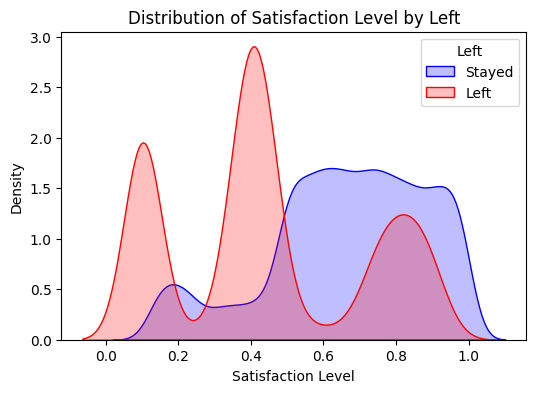

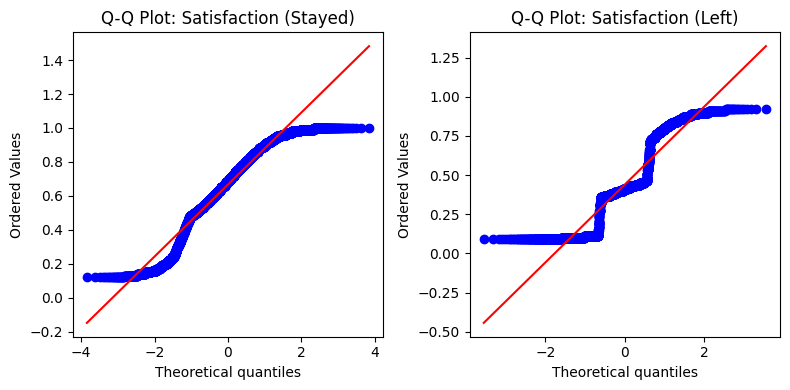

Kolmogorov-Smirnov Test (Stayed): p-value = 3.6727225272238296e-39 The data does not follow a normal distribution
Kolmogorov-Smirnov Test(Left): p-value = 3.003530362067333e-100 The data does not follow a normal distribution
Levene's Test: p-value = 2.432208339522769e-28 The variances are not equal
Pearson's correlation between Satisfaction Level and Turnover: -0.3883749834241128


In [2]:
mpl.rcParams.update(mpl.rcParamsDefault)

# Summary statistics
summary_stats = df.groupby('left')['satisfaction_level'].describe()
print(summary_stats)

# Separate data into groups
satisfaction_stayed = df[df['left'] == 0]['satisfaction_level']
satisfaction_left = df[df['left'] == 1]['satisfaction_level']

# Distribution visualization
plt.rcParams["figure.figsize"] = (6, 4)
sns.kdeplot(satisfaction_stayed, fill=True, label='Stayed', color='blue')
sns.kdeplot(satisfaction_left, fill=True, label='Left', color='red')
plt.title("Distribution of Satisfaction Level by Left")
plt.xlabel("Satisfaction Level")
plt.ylabel("Density")
plt.legend(title="Left", labels=["Stayed", "Left"])
plt.show()

# Q-Q Plot for satisfaction_stayed
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)  # First plot
stats.probplot(satisfaction_stayed, dist="norm", plot=plt)
plt.title("Q-Q Plot: Satisfaction (Stayed)")

# Q-Q Plot for satisfaction_left
plt.subplot(1, 2, 2)  # Second plot
stats.probplot(satisfaction_left, dist="norm", plot=plt)
plt.title("Q-Q Plot: Satisfaction (Left)")

plt.tight_layout()
plt.show()


from scipy.stats import kstest, norm, levene

# Normality tests using Kolmogorov-Smirnov Test
stat_stayed, p_stayed = kstest(satisfaction_stayed, 'norm', args=(satisfaction_stayed.mean(), satisfaction_stayed.std()))
stat_left, p_left = kstest(satisfaction_left, 'norm', args=(satisfaction_left.mean(), satisfaction_left.std()))

# Significance level
alpha = 0.05


if p_stayed < alpha:
    print(f"Kolmogorov-Smirnov Test (Stayed): p-value = {p_stayed}", "The data does not follow a normal distribution")
else:
    print(f"Kolmogorov-Smirnov Test (Stayed): p-value = {p_stayed}", "The data follows a normal distribution")
    
if p_left < alpha:
    print(f"Kolmogorov-Smirnov Test(Left): p-value = {p_left}", "The data does not follow a normal distribution")
else:
    print(f"Kolmogorov-Smirnov Test (Left): p-value = {p_left}", "The data follows a normal distribution")
    

# Homogeneity of variance
stat, p_levene = levene(satisfaction_stayed, satisfaction_left)

print(f"Levene's Test: p-value = {p_levene}", "The variances are not equal" if p_levene < alpha else "The variances are equal")

# Pearson's Correlation
corr, _ = pearsonr(df['satisfaction_level'], df['left'])
print(f"Pearson's correlation between Satisfaction Level and Turnover: {corr}")


- **Data Preparation for Hypothesis-Driven Bivariate Analysis** \
Given the previous outputs now is time to apply a *logarithmic* transformation to reduce skewness and improve the normality of the data. \
Then we will assess the impact of the transformation by re-running again the Shapiro-Wilk test and Levene's test and see if it will be worthy the use of parametric test such as *t-test* and *anova*.

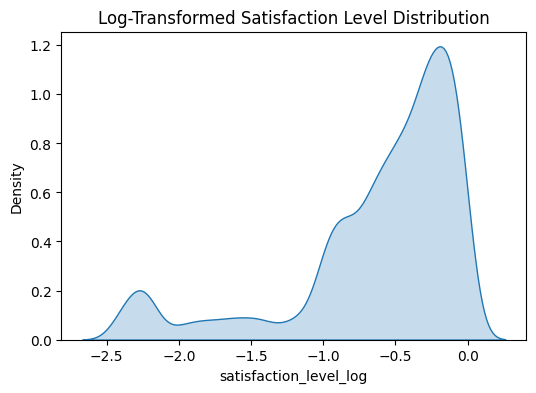

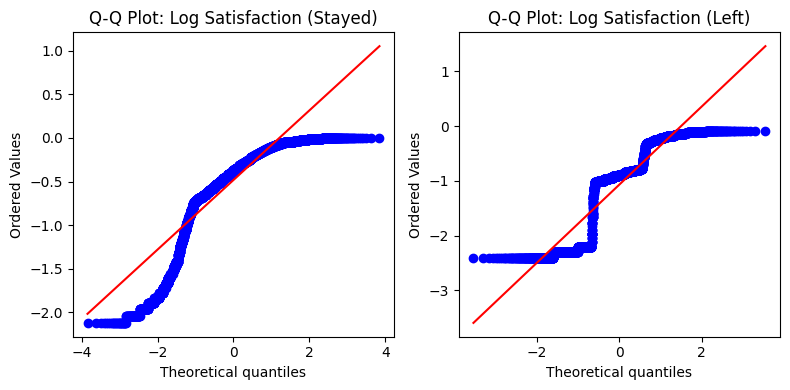

Kolmogorov-Smirnov Test (Stayed): p-value = 3.044211145927395e-193 The data does not follow a normal distribution
Kolmogorov-Smirnov Test (Left): p-value = 3.003530362067333e-100 The data does not follow a normal distribution
Levene's Test: p-value = 2.8212045620878915e-282 The variances are not equal


In [3]:
mpl.rcParams.update(mpl.rcParamsDefault)

# Transform satisfaction_level for Normality
# Apply log transformation (if satisfaction_level > 0)
df['satisfaction_level_log'] = np.log(df['satisfaction_level'])

# Visualization after transformation
plt.rcParams["figure.figsize"] = (6, 4)
sns.kdeplot(df['satisfaction_level_log'], fill=True)
plt.title("Log-Transformed Satisfaction Level Distribution")
plt.show()

log_satisfaction_stayed = df[df['left'] == 0]['satisfaction_level_log']
log_satisfaction_left = df[df['left'] == 1]['satisfaction_level_log']

# Kolmogorov-Smirnov Test on transformed data
stat_stayed, p_stayed = kstest(log_satisfaction_stayed, 'norm', args=(log_satisfaction_stayed.mean(), log_satisfaction_stayed.std()))
stat_left, p_left = kstest(satisfaction_left, 'norm', args=(satisfaction_left.mean(), satisfaction_left.std()))

# Transformation Impact Assessment
# Q-Q Plot for satisfaction_stayed
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)  # First plot
stats.probplot(log_satisfaction_stayed, dist="norm", plot=plt)
plt.title("Q-Q Plot: Log Satisfaction (Stayed)")

# Q-Q Plot for satisfaction_left
plt.subplot(1, 2, 2)  # Second plot
stats.probplot(log_satisfaction_left, dist="norm", plot=plt)
plt.title("Q-Q Plot: Log Satisfaction (Left)")

plt.tight_layout()
plt.show()


# Stayed
if p_stayed < alpha:
    print(f"Kolmogorov-Smirnov Test (Stayed): p-value = {p_stayed}", "The data does not follow a normal distribution")
else:
    print(f"Kolmogorov-Smirnov Test (Stayed): p-value = {p_stayed}", "The data follows a normal distribution")

# Left    
if p_left < alpha:
    print(f"Kolmogorov-Smirnov Test (Left): p-value = {p_left}", "The data does not follow a normal distribution")
else:
    print(f"Kolmogorov-Smirnov Test (Left): p-value = {p_left}", "The data follows a normal distribution")
    
    

# Homogeneity of variance 
# Levene's Test on transformed data
levene_test_log = levene(log_satisfaction_stayed,log_satisfaction_left)

if levene_test_log.pvalue < alpha:
    print(f"Levene's Test: p-value = {levene_test_log.pvalue}", "The variances are not equal")
else:
    print(f"Levene's Test: p-value = {levene_test_log.pvalue}", "The variances are equal")

- **Hypothesis-Driven Bivariate Analysis** \
Given the results of previous analysis and the unsuccessfull transformation, the Mann-Whitney U Test will be the chosen test given its non-parametric nature.

$H_0:$ There's no difference in satisfaction level between employees who stayed and employess who left \
**$H_1:$ There's a difference in satisfaction level between employees who stayed and employees who left**

Mann-Whitney U Test: U-statistic = 30522915.0, p-value = 0.0
The difference in satisfaction levels between 'Stayed' and 'Left' groups is statistically significant.


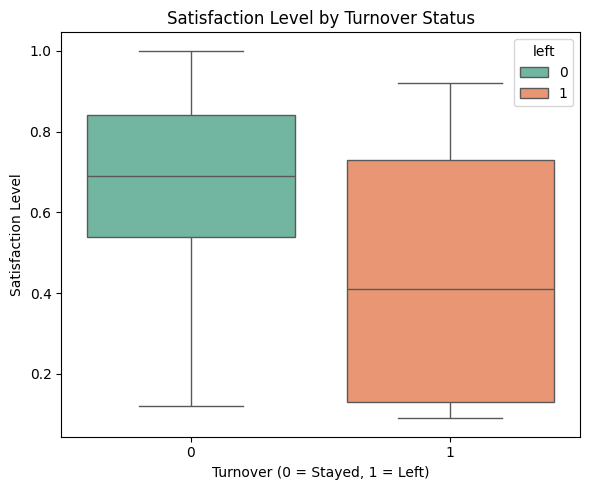

Saved at ./../reports/figures/02-EDA_02\satisfaction_vs_turnover.png


In [4]:
mpl.rcParams.update(mpl.rcParamsDefault)
# Mann-Whitney U Test
u_statistic, p_value = mannwhitneyu(satisfaction_stayed, satisfaction_left, alternative='two-sided')
print(f"Mann-Whitney U Test: U-statistic = {u_statistic}, p-value = {p_value}")

# Interpretation
if p_value < 0.05:
    print("The difference in satisfaction levels between 'Stayed' and 'Left' groups is statistically significant.")
else:
    print("No statistically significant difference in satisfaction levels between 'Stayed' and 'Left' groups.")
    

# Boxplot visualization
plt.figure(figsize=(6,5))
sns.boxplot(x='left', y='satisfaction_level', data=df, palette="Set2", hue='left')
plt.title("Satisfaction Level by Turnover Status")
plt.xlabel("Turnover (0 = Stayed, 1 = Left)")
plt.ylabel("Satisfaction Level")
plt.tight_layout()
#plt.show()

# Save figure
satisfaction_boxplot = plt.gcf()
save_fig(satisfaction_boxplot, "./../reports/figures/02-EDA_02", "satisfaction_vs_turnover")

##### **1.2. Last Evaluation vs. Left**

- **Exploration of relationships between Last Evaluation and Left**

    - **Analysis of Assumptions** \
    **Kolgomorov-Smirnov Test**: \
    For both groups (stayed and left) the p-values signals a non-normal distribution for last_evaluation.\
    **Levene's Test**: \
    Levene's test for homogeneity of variances was significant (*p = 4.910466908402928e-166*), indicating that the assumption of equal variances across groups was violated. This suggests that the variability of the dependent variable differs among groups.

    - **Visualizations**: \
    A bimodal distribution for employees who left the company (two peaks: 0.4–0.6 and 0.7–1.0) is observed on the density plots. This suggests:
        1. There may be two distinct subgroups within those who left: \
        Employees evaluated as **average or below average (0.4–0.6)**.\
        Employees evaluated as **high performers (0.7–1.0)**.
        2. This could imply different turnover dynamics, possibly driven by: \
        **Disengagement or dissatisfaction** among lower performers.
        **Burnout, overwork, or missed recognition** for high performers.
        3. For the Stayed Group: \
        The distribution seems unimodal, centered around average evaluation scores. This implies that **most employees who stay tend to have average performance ratings**, aligning with typical retention trends.

    - **Following Steps** \
    **Mann-Whitnye U Test**: We will go straight to a Mann-Whitney U test to evaluate the aggregation relationship between last_evaluation and left. \
    If significant, segmentation will be considered to deepen the analysis and possibly engineer new features that can capture the binomial distribuiton (e.g. like a binary 'High performance' indicator).

        count      mean       std   min   25%   50%   75%  max
left                                                          
0     11428.0  0.715473  0.162005  0.36  0.58  0.71  0.85  1.0
1      3571.0  0.718113  0.197673  0.45  0.52  0.79  0.90  1.0


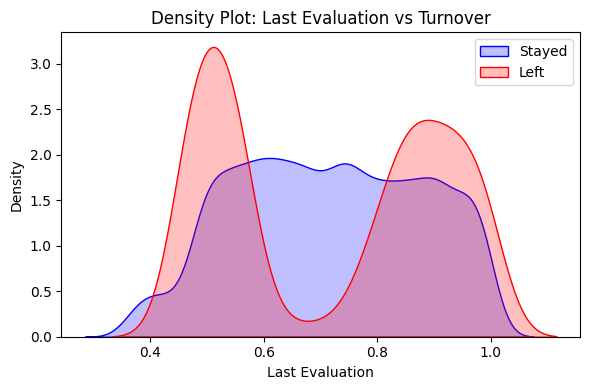

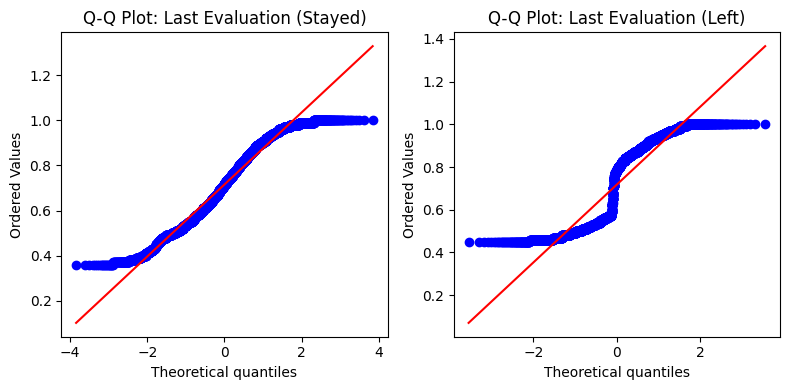

Kolmogorov-Smirnov Test (Stayed): p-value = 2.1747165732265684e-38 The data does not follow a normal distribution
Kolmogorov-Smirnov Test (Left): p-value = 1.3204127013875974e-151 The data does not follow a normal distribution
Levene's Test: p-value = 4.910466908402928e-166 The variances are not equal
Pearson's correlation between Last Evaluation and Turnover: 0.006567120447534069


In [5]:
mpl.rcParams.update(mpl.rcParamsDefault)
# Separate data into groups
evaluation_stayed = df[df['left'] == 0]['last_evaluation']
evaluation_left = df[df['left'] == 1]['last_evaluation']

# Summary statistics
summary_stats = df.groupby('left')['last_evaluation'].describe()
print(summary_stats)

# Density Plot
plt.figure(figsize=(6, 4))
sns.kdeplot(evaluation_stayed, fill=True, label='Stayed', color='blue')
sns.kdeplot(evaluation_left, fill=True, label='Left', color='red')
plt.title('Density Plot: Last Evaluation vs Turnover')
plt.xlabel('Last Evaluation')
plt.legend()
plt.tight_layout()
plt.show()

# Q-Q Plot for Last Evaluation
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)  # First plot
stats.probplot(evaluation_stayed, dist="norm", plot=plt)
plt.title("Q-Q Plot: Last Evaluation (Stayed)")

# Q-Q Plot for Last Evaluation
plt.subplot(1, 2, 2)  # Second plot
stats.probplot(evaluation_left, dist="norm", plot=plt)
plt.title("Q-Q Plot: Last Evaluation (Left)")

plt.tight_layout()
plt.show()

# Normality tests using Kolmogorov-Smirnov Test
stat_stayed, p_stayed = kstest(evaluation_stayed, 'norm', args=(evaluation_stayed.mean(), evaluation_stayed.std()))
stat_left, p_left = kstest(evaluation_left, 'norm', args=(evaluation_left.mean(), evaluation_left.std()))

# Significance level
alpha = 0.05

# For Stayed
if p_stayed < alpha:
    print(f"Kolmogorov-Smirnov Test (Stayed): p-value = {p_stayed}", "The data does not follow a normal distribution")
else:
    print(f"Kolmogorov-Smirnov Test (Stayed): p-value = {p_stayed}", "The data does follows a normal distribution")
    
# For Left
if p_left < alpha:
    print(f"Kolmogorov-Smirnov Test (Left): p-value = {p_left}", "The data does not follow a normal distribution")
else:
    print(f"Kolmogorov-Smirnov Test (Left): p-value = {p_left}", "The data does follows a normal distribution")

# Homogeneity of Variance Test
levene_test = levene(evaluation_stayed, evaluation_left)
print(f"Levene's Test: p-value = {levene_test.pvalue}", "The variances are not equal" if levene_test.pvalue < alpha else "The variances are equal")

# Pearson's Correlation
corr, _ = pearsonr(df['last_evaluation'], df['left'])
print(f"Pearson's correlation between Last Evaluation and Turnover: {corr}")

        count      mean       std   min   25%   50%   75%  max
left                                                          
0     11428.0  0.715473  0.162005  0.36  0.58  0.71  0.85  1.0
1      3571.0  0.718113  0.197673  0.45  0.52  0.79  0.90  1.0


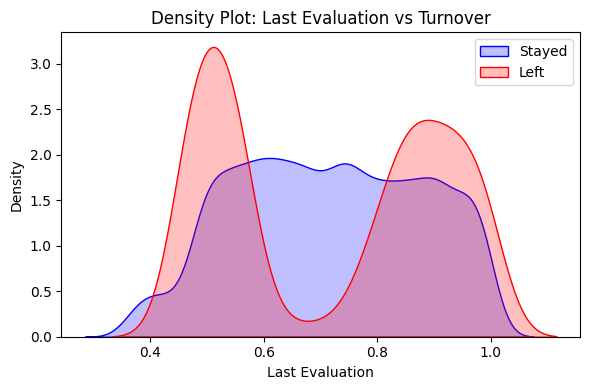

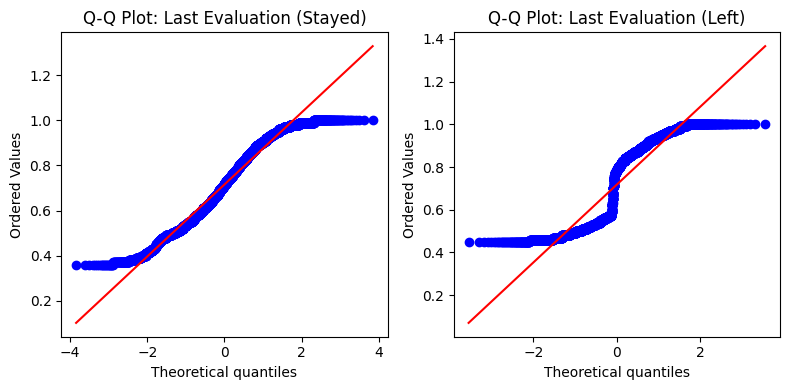

Kolmogorov-Smirnov Test (Stayed): p-value = 2.1747165732265684e-38 The data does not follow a normal distribution
Kolmogorov-Smirnov Test (Left): p-value = 1.3204127013875974e-151 The data does not follow a normal distribution
Levene's Test: p-value = 4.910466908402928e-166 The variances are not equal
Pearson's correlation between Last Evaluation and Turnover: 0.006567120447534069


In [6]:
mpl.rcParams.update(mpl.rcParamsDefault)
# Separate data into groups
evaluation_stayed = df[df['left'] == 0]['last_evaluation']
evaluation_left = df[df['left'] == 1]['last_evaluation']

# Summary statistics
summary_stats = df.groupby('left')['last_evaluation'].describe()
print(summary_stats)

# Density Plot
plt.figure(figsize=(6, 4))
sns.kdeplot(evaluation_stayed, fill=True, label='Stayed', color='blue')
sns.kdeplot(evaluation_left, fill=True, label='Left', color='red')
plt.title('Density Plot: Last Evaluation vs Turnover')
plt.xlabel('Last Evaluation')
plt.legend()
plt.tight_layout()
plt.show()

# Q-Q Plot for Last Evaluation
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)  # First plot
stats.probplot(evaluation_stayed, dist="norm", plot=plt)
plt.title("Q-Q Plot: Last Evaluation (Stayed)")

# Q-Q Plot for Last Evaluation
plt.subplot(1, 2, 2)  # Second plot
stats.probplot(evaluation_left, dist="norm", plot=plt)
plt.title("Q-Q Plot: Last Evaluation (Left)")

plt.tight_layout()
plt.show()

# Normality tests using Kolmogorov-Smirnov Test
stat_stayed, p_stayed = kstest(evaluation_stayed, 'norm', args=(evaluation_stayed.mean(), evaluation_stayed.std()))
stat_left, p_left = kstest(evaluation_left, 'norm', args=(evaluation_left.mean(), evaluation_left.std()))

# Significance level
alpha = 0.05

# For Stayed
if p_stayed < alpha:
    print(f"Kolmogorov-Smirnov Test (Stayed): p-value = {p_stayed}", "The data does not follow a normal distribution")
else:
    print(f"Kolmogorov-Smirnov Test (Stayed): p-value = {p_stayed}", "The data does follows a normal distribution")
    
# For Left
if p_left < alpha:
    print(f"Kolmogorov-Smirnov Test (Left): p-value = {p_left}", "The data does not follow a normal distribution")
else:
    print(f"Kolmogorov-Smirnov Test (Left): p-value = {p_left}", "The data does follows a normal distribution")

# Homogeneity of Variance Test
levene_test = levene(evaluation_stayed, evaluation_left)
print(f"Levene's Test: p-value = {levene_test.pvalue}", "The variances are not equal" if levene_test.pvalue < alpha else "The variances are equal")

# Pearson's Correlation
corr, _ = pearsonr(df['last_evaluation'], df['left'])
print(f"Pearson's correlation between Last Evaluation and Turnover: {corr}")

- **Hypothesis-Driven Bivariate Analysis (Last Evaluation and Left)** \
**$H_0:$ There's no difference in last_evaluation between employees who stayed and employess who left** \
$H_1:$ There's a difference in last_evaluation between employees who stayed and employees who left

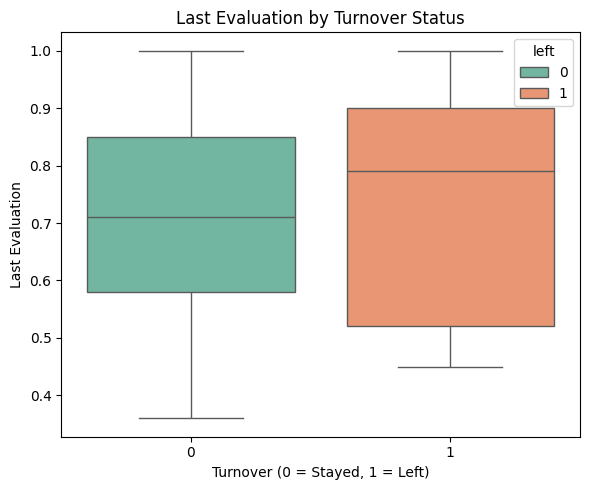

Saved at ./../reports/figures/02-EDA_02/last_evaluation_vs_left.png
Mann-Whitney U Test: U-statistic = 20472187.0, p-value = 0.7650349266478002
The difference in last evaluation scores between 'Stayed' and 'Left' groups is not statistically significant.


In [7]:
# Boxplot visualization
plt.figure(figsize=(6,5))
sns.boxplot(x='left', y='last_evaluation', data=df, palette="Set2", hue='left')
plt.title("Last Evaluation by Turnover Status")
plt.xlabel("Turnover (0 = Stayed, 1 = Left)")
plt.ylabel("Last Evaluation")
plt.tight_layout()
#plt.show()

# Save Figure
figure = plt.gcf()
save_fig(figure,"./../reports/figures/02-EDA_02/", "last_evaluation_vs_left")

# Perform Mann-Whitney U Test
u_statistic, p_value = mannwhitneyu(evaluation_stayed, evaluation_left, alternative='two-sided')

# Significance level
alpha = 0.05

# Display results
print(f"Mann-Whitney U Test: U-statistic = {u_statistic}, p-value = {p_value}")
if p_value < alpha:
    print("The difference in last evaluation scores between 'Stayed' and 'Left' groups is statistically significant.")
else:
    print("The difference in last evaluation scores between 'Stayed' and 'Left' groups is not statistically significant.")

##### **1.3. Average Monthly Hours vs. Left**

- **Exploration of relationships between Satisfaction and Left**
    - **Analysis of Assumptions**
    **Kolmogorov-Smirnov Test**:
    For both groups (Stayed and Left), the p-values indicate that average monthly hours do not follow a normal distribution.
    **Levene's Test**: \
    Levene's test for homogeneity of variances was significant (p < 0.05), indicating that the assumption of equal variances across groups is violated.

    - **Visualizations**:
    **Boxplot Insights**: \
    Employees who left exhibit higher average monthly hours compared to those who stayed, suggesting potential overwork as a turnover driver. \
    **Density Plot Insights**: \
    Similar to last_evaluation, a bimodal distribution is observed within the Left group, suggesting:
    1. Two distinct subgroups among employees who left: \
    Employees with 100–190 average monthly hours (**lower workload**). \
    Employees with 200–345 average monthly hours (**higher workload**). \
    2. Potential turnover dynamics include: \
    Disengagement or dissatisfaction among employees with fewer hours and responsibilities. \
    Burnout, overwork, or missed recognition among employees with higher monthly workloads. \
    3. For the Stayed group: \
    The distribution is nearly unimodal, centered around 120–300 average monthly hours, with some overlap between Stayed and Left groups.
    **Q-Q Plot Insights**: \
    Both groups deviate significantly from the normal distribution, reinforcing the findings from the Kolmogorov-Smirnov test.

    - **Correlation Analysis**: \
    Pearson's correlation coefficient shows a moderate positive relationship between average monthly hours and turnover, suggesting that higher hours may increase the likelihood of leaving.

    - **Following Steps**: \
    **Mann-Whitney U Test**: A non-parametric test will assess whether the difference in average monthly hours between the groups is statistically significant. \
    Depending on the results, feature engineering may involve creating a new categorical feature to capture workload levels (e.g., "low workload," "average workload," and "overwork risk").

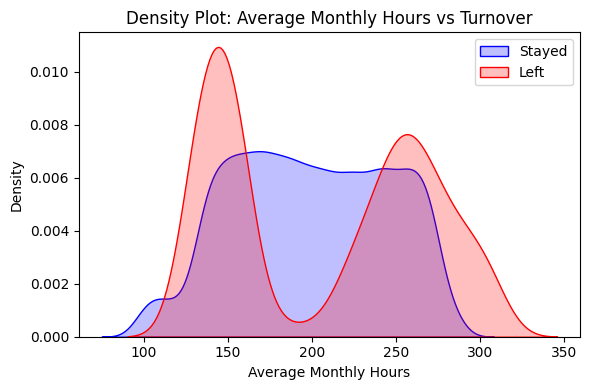

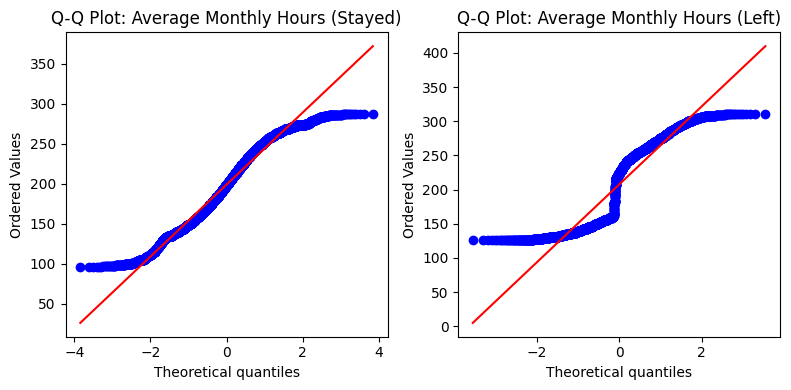

KS Test (Stayed): p-value = 0.0 The data does not follow a normal distribution
KS Test (Left): p-value = 0.0 The data does not follow a normal distribution
Levene's Test: p-value = 1.7110873490041145e-297 The variances are not equal
Pearson's correlation between Average Monthly Hours and Turnover: 0.07128717878330057


In [8]:
mpl.rcParams.update(mpl.rcParamsDefault)

# Separate data into groups
monthly_stayed = df[df['left'] == 0]['average_montly_hours']
monthly_left = df[df['left'] == 1]['average_montly_hours']

# Density Plot
plt.figure(figsize=(6, 4))
sns.kdeplot(monthly_stayed, fill=True, label='Stayed', color='blue')
sns.kdeplot(monthly_left, fill=True, label='Left', color='red')
plt.title('Density Plot: Average Monthly Hours vs Turnover')
plt.xlabel('Average Monthly Hours')
plt.legend()
plt.tight_layout()
plt.show()

# Q-Q Plot for Last Evaluation
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)  # First plot
stats.probplot(monthly_stayed, dist="norm", plot=plt)
plt.title("Q-Q Plot: Average Monthly Hours (Stayed)")

# Q-Q Plot for Last Evaluation
plt.subplot(1, 2, 2)  # Second plot
stats.probplot(monthly_left, dist="norm", plot=plt)
plt.title("Q-Q Plot: Average Monthly Hours (Left)")

plt.tight_layout()
plt.show()

# Normality Tests (Kolmogorov-Smirnov)
ks_stayed = stats.kstest(monthly_stayed, 'norm')
ks_left = stats.kstest(monthly_left, 'norm')

# Significance level
alpha = 0.05

# For Stayed
if ks_stayed.pvalue < alpha:
    print(f"KS Test (Stayed): p-value = {ks_stayed.pvalue}", "The data does not follow a normal distribution")
else:
    print(f"KS Test (Stayed): p-value = {ks_stayed.pvalue}", "The data follows a normal distribution")
    
# For Left
if ks_left.pvalue < alpha:
    print(f"KS Test (Left): p-value = {ks_left.pvalue}", "The data does not follow a normal distribution")
else:
    print(f"KS Test (Left): p-value = {ks_left.pvalue}", "The data follows a normal distribution")

# Homogeneity of Variance Test (Levene's Test)
levene_test = levene(monthly_stayed, monthly_left)

if levene_test.pvalue < alpha:
    print(f"Levene's Test: p-value = {levene_test.pvalue}", "The variances are not equal")
else:
    print(f"Levene's Test: p-value = {levene_test.pvalue}", "The variances are equal")

# Pearson's Correlation
corr, _ = pearsonr(df['average_montly_hours'], df['left'])
print(f"Pearson's correlation between Average Monthly Hours and Turnover: {corr}")



- **Hypothesis-Driven Bivariate Analysis (Average Monthly Hours Vs Left)** \
$H_0$:There is no significant difference in average monthly hours between employees who stayed (Left = 0) and those who left (Left = 1). \
**$H_1$:There is a significant difference in average monthly hours between employees who stayed (Left = 0) and those who left (Left = 1).**

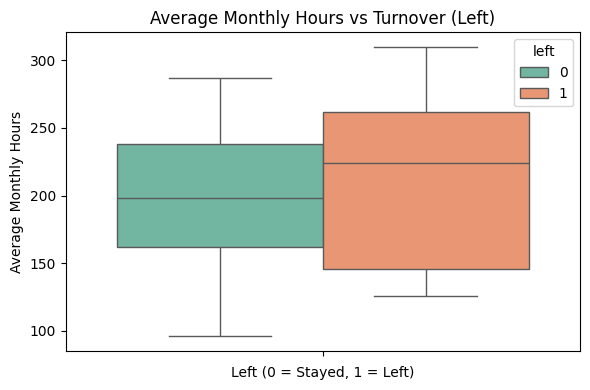

Saved at ./../reports/figures/02-EDA_02/avg_monthly_hours_vs_left.png
Mann-Whitney U Test statistic: 19119787.5
p-value: 1.2769565984354332e-08
Reject the null hypothesis: There is a significant difference in average monthly hours between the two groups.


In [9]:
mpl.rcParams.update(mpl.rcParamsDefault)

# Boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(hue='left', y='average_montly_hours', data=df, palette='Set2')
plt.title('Average Monthly Hours vs Turnover (Left)')
plt.xlabel('Left (0 = Stayed, 1 = Left)')
plt.ylabel('Average Monthly Hours')
plt.tight_layout()
#plt.show()

# Save fig
figure = plt.gcf()
save_fig(figure, "./../reports/figures/02-EDA_02/","avg_monthly_hours_vs_left")

# Perform the Mann-Whitney U Test
u_statistic, p_value = mannwhitneyu(monthly_stayed, monthly_left, alternative='two-sided')

# Set significance level
alpha = 0.05

# Display results
print(f"Mann-Whitney U Test statistic: {u_statistic}")
print(f"p-value: {p_value}")

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in average monthly hours between the two groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference in average monthly hours between the two groups.")

### **2 .Categorical Features**

##### **2.1. Time Spent at Company vs. Left**

- **Exploration of relationships between Time Spent at Company and Left** \
Checking for trends in turnover based on time spent at the company. \
    **Expected Frequency Condition Check**\
    Using the provided contingency table:\
    Some rows have zero counts in the left=1 column (e.g., time_spend_company = 7, 8, and 10). This violates the expected frequency condition, as the expected values in these cells will be less than 5, making the chi-square test results unreliable.
    **Feature Engineering Consideration**: \
    This strong association suggests potential for feature engineering. A new categorical feature could group employees into tenure brackets (e.g., low, medium, and high tenure) to capture this pattern effectively.

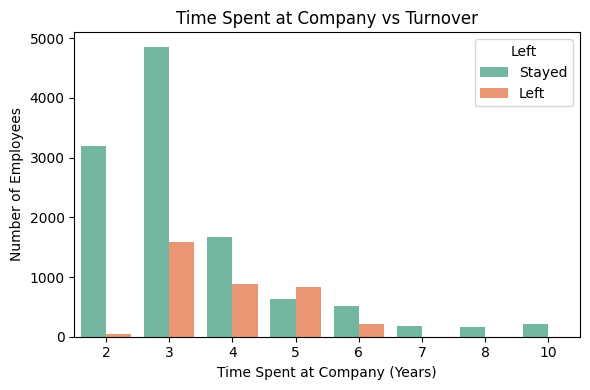

left                   0     1
time_spend_company            
2                   3191    53
3                   4857  1586
4                   1667   890
5                    640   833
6                    509   209
7                    188     0
8                    162     0
10                   214     0


In [10]:
mpl.rcParams.update(mpl.rcParamsDefault)

# Count plot for Time Spent at Company vs Left
plt.figure(figsize=(6, 4))
sns.countplot(x='time_spend_company', hue='left', data=df, palette='Set2')
plt.title('Time Spent at Company vs Turnover')
plt.xlabel('Time Spent at Company (Years)')
plt.ylabel('Number of Employees')
plt.legend(title='Left', labels=['Stayed', 'Left'])
plt.tight_layout()
plt.show()


# Crosstabulation
time_left_ct = pd.crosstab(df['time_spend_company'], df['left'])
print(time_left_ct)

- **Data Preparation for Hypothesis-Driven Bivariate Analysis** \
To address the sparse data issue, we will combine categories where the frequencies in the left=1 column are zero or extremely low. Here's the plan for transforming time_spend_company: \
**2-5 years**: Keep as-is because these ranges have reasonable counts in both left=0 and left=1. \
**6, 7, 8, 10+ years**: Combine into a single category called 6+ years. \
This way the data will be able to met the assumption of frequency counts.

Transformed Contingency Table:
left                               0     1
time_spend_company_transformed            
2 years                         3191    53
3 years                         4857  1586
4 years                         1667   890
5 years                          640   833
6+ years                        1073   209


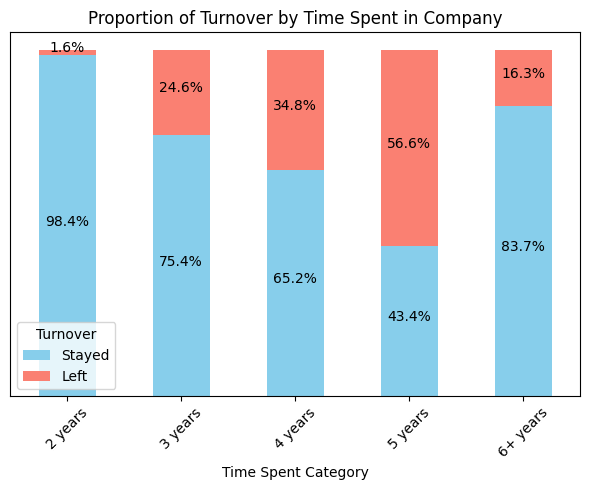

Saved at ./../reports/figures/02-EDA_02/time_spent_company_transformed_vs_left.png


In [61]:
# Transform the feature
df['time_spend_company_transformed'] = df['time_spend_company'].apply(
    lambda x: '6+ years' if x >= 6 else f'{x} years'
)

# Create the new contingency table
time_spend_company_ct = pd.crosstab(
    df['time_spend_company_transformed'],
    df['left']
)

print("Transformed Contingency Table:")
print(time_spend_company_ct)

# Normalize the contingency table to show proportions
time_spend_company_ct_normalized = time_spend_company_ct.div(time_spend_company_ct.sum(axis=1), axis=0)

# Plot the proportions
ax = time_spend_company_ct_normalized.plot(
    kind='bar', stacked=True, figsize=(6, 5), color=['skyblue', 'salmon']
)
plt.title('Proportion of Turnover by Time Spent in Company')
plt.yticks([])
plt.ylabel(None)
plt.xlabel('Time Spent Category')
plt.legend(['Stayed', 'Left'], title='Turnover')
plt.xticks(rotation=45)

# Annotate the percentages
for idx, row in enumerate(time_spend_company_ct_normalized.itertuples(index=False)):
    stayed_pct = row[0] * 100  # Proportion of Stayed
    left_pct = row[1] * 100    # Proportion of Left

    # Position annotations on each bar
    plt.text(idx, row[0] / 2, f"{stayed_pct:.1f}%", ha='center', color='black', fontsize=10)
    plt.text(idx, row[0] + (row[1] / 2), f"{left_pct:.1f}%", ha='center', color='black', fontsize=10)

plt.tight_layout()
#plt.show()  

# Save Fig
figure = plt.gcf()
save_fig(figure, "./../reports/figures/02-EDA_02/", "time_spent_company_transformed_vs_left")


- **Hypothesis-Driven Bivariate Analysis Time Spent at Company vs Left** \
$H_0$:There is no significant association between time_spend_company and left. \
$H_1$:**There is a significant association between time_spend_company and left.**

In [12]:
# Perform the chi-square test of independence on the transformed table
chi2_stat_transformed, p_value_transformed, dof_transformed, expected_transformed = chi2_contingency(contingency_table)

# Print results
alpha = 0.05
print(f"Chi-Square Test Statistic: {chi2_stat_transformed}")
print(f"p-value: {p_value_transformed:.4f}")
if p_value_transformed < alpha:
    print("Reject the null hypothesis: There is a significant association between time spent at company and turnover.")
else:
    print("Fail to reject the null hypothesis: No significant association between time spent at company and turnover.")


Chi-Square Test Statistic: 1962.5347640780328
p-value: 0.0000
Reject the null hypothesis: There is a significant association between time spent at company and turnover.


##### **2.2. Number of Projects vs. Left**

- **Exploration of Relationships Between Number of Projects and Left** \
    **Expected Frequency Issue** \
    Categories such as 7 projects have a count of 0 for one group (left = 0). This will lead to expected frequencies below 5, violating the assumptions of the test. \
    **Sparse Data for Some Categories** \
    Some project counts appear sparsely represented, such as 2 projects and 7 projects, which may skew the analysis.

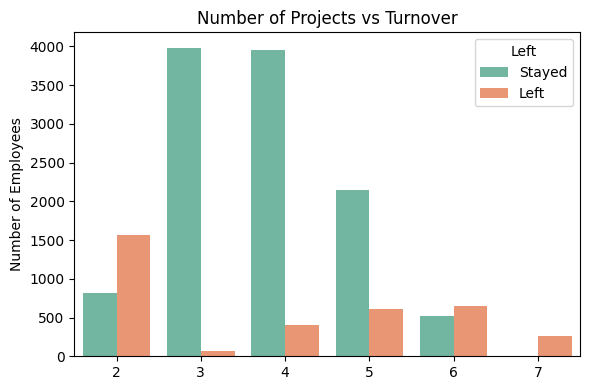

left               0     1
number_project            
2                821  1567
3               3983    72
4               3956   409
5               2149   612
6                519   655
7                  0   256


In [13]:
mpl.rcParams.update(mpl.rcParamsDefault)

# Count plot for Time Spent at Company vs Left
plt.figure(figsize=(6, 4))
sns.countplot(x='number_project', hue='left', data=df, palette='Set2')
plt.title('Number of Projects vs Turnover')
plt.xlabel(None)
plt.ylabel('Number of Employees')
plt.legend(title='Left', labels=['Stayed', 'Left'])
plt.tight_layout()
plt.show()


# Crosstabulation
time_left_ct = pd.crosstab(df['number_project'], df['left'])
print(time_left_ct)

- **Data Preparation For Hypothesis-driven Bivariate Analysis** \
To ensure all expected frequencies meet the minimum threshold, we will combine project numbers into broader bins: \
**Low Projects: 2–3 projects** \
**Average Projects: 4–5 projects** \
**High Projects: 6–7 projects** 

Grouped Contingency Table:
left                       0     1
project_category                  
Average Projects (4–5)  6105  1021
High Projects (6–7)      519   911
Low Projects (2–3)      4804  1639


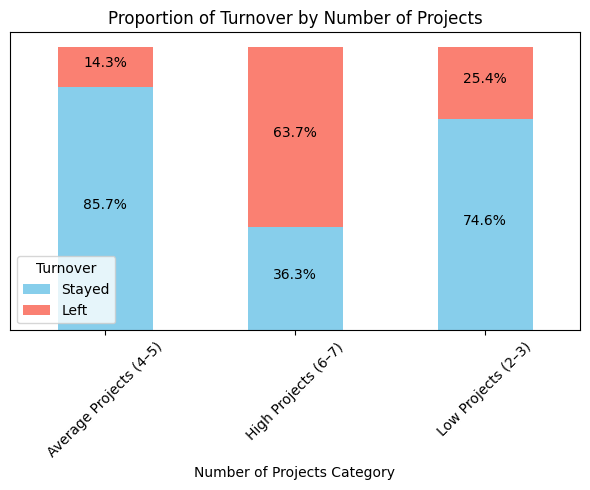

Saved at ./../reports/figures/02-EDA_02\n_projects_transformed_vs_left.png


In [60]:
mpl.rcParams.update(mpl.rcParamsDefault)

# Group projects into categories
def group_projects(num):
    if num <= 3:
        return 'Low Projects (2–3)'
    elif 4 <= num <= 5:
        return 'Average Projects (4–5)'
    else:
        return 'High Projects (6–7)'

# Apply the grouping function
df['project_category'] = df['number_project'].apply(group_projects)

# Generate the contingency  
n_projects_ct = pd.crosstab(df['project_category'], df['left'])
print("Grouped Contingency Table:")
print(n_projects_ct)

# Normalize the contingency table to show proportions
n_projects_ct_normalized = n_projects_ct.div(n_projects_ct.sum(axis=1), axis=0)

# Plot the proportions
ax = n_projects_ct_normalized.plot(
    kind='bar', stacked=True, figsize=(6, 5), color=['skyblue', 'salmon']
)
plt.title('Proportion of Turnover by Number of Projects')
plt.yticks([])
plt.ylabel(None)
plt.xlabel('Number of Projects Category')
plt.legend(['Stayed', 'Left'], title='Turnover')
plt.xticks(rotation=45)

# Annotate the percentages
for idx, row in enumerate(n_projects_ct_normalized.itertuples(index=False)):
    stayed_pct = row[0] * 100  # Proportion of Stayed
    left_pct = row[1] * 100    # Proportion of Left

    # Position annotations on each bar
    plt.text(idx, row[0] / 2, f"{stayed_pct:.1f}%", ha='center', color='black', fontsize=10)
    plt.text(idx, row[0] + (row[1] / 2), f"{left_pct:.1f}%", ha='center', color='black', fontsize=10)

plt.tight_layout()
#plt.show()    

# Save Figure
figure = plt.gcf()
save_fig(figure, "./../reports/figures/02-EDA_02", "n_projects_transformed_vs_left")

- **Hypothesis-Driven Bivariate Analysis Number of Projects vs Left** \
$H_0$:There is no significant association between time_spend_company and left. \
$H_1$:**There is a significant association between number_projects and left.**

In [15]:
# Chi-Square Test on grouped categories
chi2_stat_transformed, p_value_transformed, dof_transformed, expected = chi2_contingency(contingency_table_grouped)

# Print results
alpha = 0.05

print(f"Chi-Square Test Statistic: {chi2_stat_transformed}")
print(f"p-value: {p_value_transformed:.4f}")
if p_value_transformed < alpha:
    print("Reject the null hypothesis: There is a significant association between the number of projects and turnover.")
else:
    print("Fail to reject the null hypothesis: No significant association between the number of projects and turnover.")


Chi-Square Test Statistic: 1617.398871536701
p-value: 0.0000
Reject the null hypothesis: There is a significant association between the number of projects and turnover.


##### **2.3. Work Accident and Left:**

- **Exploration of relationships between Work Accident and Left** \
Since Work_accident is a binary categorical variable (0 = no accident, 1 = accident), we can analyze the relationship between this feature and turnover using a contingency table followed by a Chi-Square test for independence.

Contingency Table:
 left              0     1
Work_accident            
0              9428  3402
1              2000   169


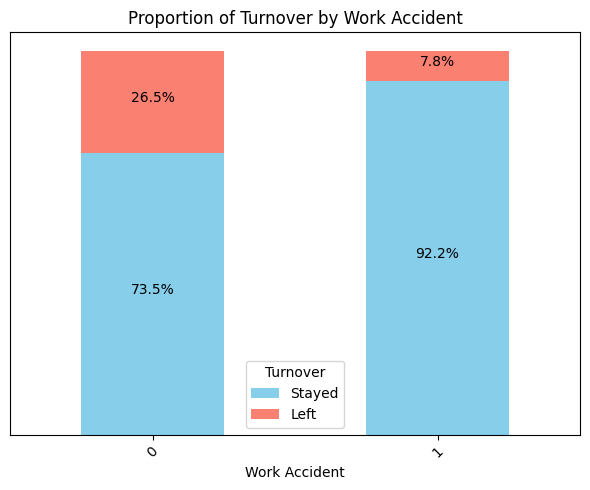

Saved at ./../reports/figures/02-EDA_02\work_accident_vs_left.png


In [59]:
mpl.rcParams.update(mpl.rcParamsDefault)

# Crosstabulation
work_accident_ct = pd.crosstab(df['Work_accident'], df['left'])
print("Contingency Table:\n", work_accident_ct)

# Normalize the contingency table to show proportions
work_accident_ct_normalized = work_accident_ct.div(work_accident_ct.sum(axis=1), axis=0)

# Plot the proportions
ax = work_accident_ct_normalized.plot(
    kind='bar', stacked=True, figsize=(6, 5), color=['skyblue', 'salmon']
)
plt.title('Proportion of Turnover by Work Accident')
plt.yticks([])
plt.ylabel(None)
plt.xlabel('Work Accident')
plt.legend(['Stayed', 'Left'], title='Turnover')
plt.xticks(rotation=45)

# Annotate the percentages
for idx, row in enumerate(work_accident_ct_normalized.itertuples(index=False)):
    stayed_pct = row[0] * 100  # Proportion of Stayed
    left_pct = row[1] * 100    # Proportion of Left

    # Position annotations on each bar
    plt.text(idx, row[0] / 2, f"{stayed_pct:.1f}%", ha='center', color='black', fontsize=10)
    plt.text(idx, row[0] + (row[1] / 2), f"{left_pct:.1f}%", ha='center', color='black', fontsize=10)

plt.tight_layout()
#plt.show() 

# Save Figure
figure = plt.gcf()
save_fig(figure, "./../reports/figures/02-EDA_02", "work_accident_vs_left")

- **Hypothesis-Driven Bivariate Analysis** \
$H_0$: There's no significant association between Work_accident and Left. \
**$H_1$: There's a significant association between Work_accident and Left**.

In [25]:
chi2, p, dof, expected = chi2_contingency(work_accident_ct)

print("\nChi-Square Test Statistic:", chi2)
print("p-value:", p)

# Check if the result is statistically significant
if p < 0.05:
    print("Reject the null hypothesis: There is a significant association between work accidents and turnover.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between work accidents and turnover.")


Chi-Square Test Statistic: 357.5623604097228
p-value: 9.55823958002199e-80
Reject the null hypothesis: There is a significant association between work accidents and turnover.


##### **2.4. Department vs. Left**

- **Exploration of relationships between Satisfaction and Left**

Contingency Table:
left            0     1
Department             
IT            954   273
RandD         666   121
accounting    563   204
hr            524   215
management    539    91
marketing     655   203
product_mng   704   198
sales        3126  1014
support      1674   555
technical    2023   697


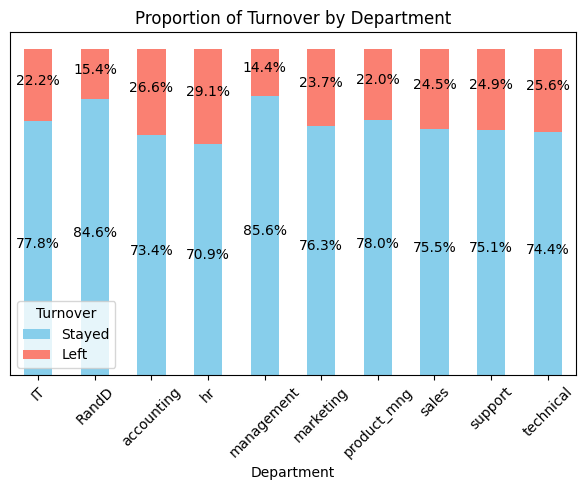

Saved at ./../reports/figures/02-EDA_02\Department_vs_left.png


In [58]:
mpl.rcParams.update(mpl.rcParamsDefault)

# Generate the contingency table
department_left_ct = pd.crosstab(df['Department'], df['left'])
print("Contingency Table:")
print(department_left_ct)

# Normalize the contingency table to show proportions
department_left_ct_normalized = department_left_ct.div(department_left_ct.sum(axis=1), axis=0)

# Plot the proportions
ax = department_left_ct_normalized.plot(
    kind='bar', stacked=True, figsize=(6, 5), color=['skyblue', 'salmon']
)
plt.title('Proportion of Turnover by Department')
plt.yticks([])
plt.ylabel(None)
plt.xlabel('Department')
plt.legend(['Stayed', 'Left'], title='Turnover')
plt.xticks(rotation=45)

# Annotate the percentages
for idx, row in enumerate(department_left_ct_normalized.itertuples(index=False)):
    stayed_pct = row[0] * 100  # Proportion of Stayed
    left_pct = row[1] * 100    # Proportion of Left

    # Position annotations on each bar
    plt.text(idx, row[0] / 2, f"{stayed_pct:.1f}%", ha='center', color='black', fontsize=10)
    plt.text(idx, row[0] + (row[1] / 2), f"{left_pct:.1f}%", ha='center', color='black', fontsize=10)

plt.tight_layout()
#plt.show()

# Save Figure
figure = plt.gcf()
save_fig(figure, "./../reports/figures/02-EDA_02", "Department_vs_left")

- **Hypothesis-Driven Bivariate Analysis**

In [40]:
# Perform the Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(department_left_ct)
print(f"Chi-Square Test Statistic: {chi2_stat}")
print(f"p-value: {p_value}")

# Check if the result is statistically significant
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant association between Department and turnover.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between Department and turnover.")

Chi-Square Test Statistic: 86.82547426790299
p-value: 7.042130463822518e-15
Reject the null hypothesis: There is a significant association between Department and turnover.


##### **2.5. Salary Level vs. Left**

- **Exploration of relationships between Satisfaction and Left**

left       0     1
salary            
high    1155    82
low     5144  2172
medium  5129  1317


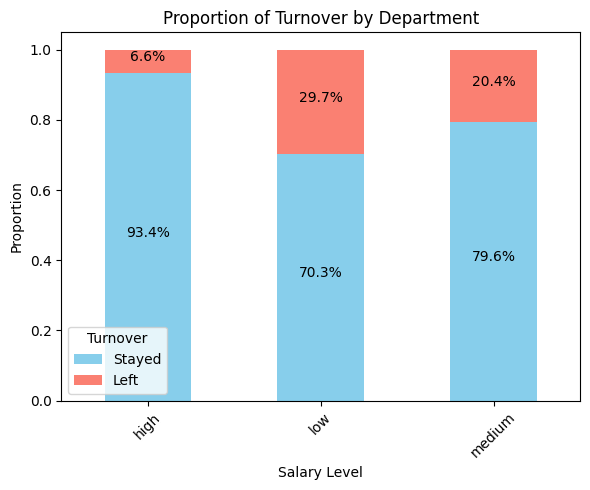

Saved at ./../reports/figures/02-EDA_02\salary_level_vs_left.png


In [52]:
mpl.rcParams.update(mpl.rcParamsDefault)

# Generate contingency table
salary_left_ct = pd.crosstab(df['salary'], df['left'])
print(salary_left_ct)

# Normalize the contingency table to show proportions
salary_left_ct_normalized = salary_left_ct.div(salary_left_ct.sum(axis=1), axis=0)

# Plot the proportions
ax = salary_left_ct_normalized.plot(
    kind='bar', stacked=True, figsize=(6, 5), color=['skyblue', 'salmon']
)
plt.title('Proportion of Turnover by Department')
plt.ylabel('Proportion')
plt.xlabel('Salary Level')
plt.legend(['Stayed', 'Left'], title='Turnover')
plt.xticks(rotation=45)

# Annotate the percentages
for idx, row in enumerate(salary_left_ct_normalized.itertuples(index=False)):
    stayed_pct = row[0] * 100  # Proportion of Stayed
    left_pct = row[1] * 100    # Proportion of Left

    # Position annotations on each bar
    plt.text(idx, row[0] / 2, f"{stayed_pct:.1f}%", ha='center', color='black', fontsize=10)
    plt.text(idx, row[0] + (row[1] / 2), f"{left_pct:.1f}%", ha='center', color='black', fontsize=10)

plt.tight_layout()
#plt.show()

# Save Figure
figure = plt.gcf()
save_fig(figure, "./../reports/figures/02-EDA_02", "salary_level_vs_left")

- **Hypothesis-Driven Bivariate Analysis** \
$𝐻_0$: There is no association between salary level and employee turnover. \
**$𝐻_1$: There is a significant association between salary level and employee turnover.**

In [ ]:
# Perform Chi-Square Test
chi2_stat, p_value, _, expected = chi2_contingency(salary_left_ct)

print(f"Chi-Square Test Statistic: {chi2_stat:.4f}")
print(f"p-value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant association between salary level and turnover.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between salary level and turnover.")


Chi-Square Test Statistic: 381.2250
p-value: 0.0000
Reject the null hypothesis: There is a significant association between salary level and turnover.


### Save Current Dataset

In [62]:
df.to_csv('./../data/processed/df_subset_2.csv', index=False)